In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
%matplotlib inline

In [17]:
# Get path to data directory
import os
workingdir = os.path.abspath(os.getcwd())
datadir = workingdir + '\data'
expressiondir = datadir + "\\facial_expressions"
datafile = expressiondir + '/data/legend-copy.csv'
datafile2 = expressiondir + '/data/500_picts_satz.csv'
imagedir = expressiondir + '\\images'

In [18]:
face1 = pd.read_csv(datafile, index_col = False)
face2 = pd.read_csv(datafile2, names = face1.columns, index_col = False)
faces = pd.concat([face1,face2])

In [19]:
faces = faces[1:] # First image doesn't work
faces = faces.reset_index(drop = True)

In [20]:
emotions = faces.emotion.value_counts()

In [21]:
emotions

neutral      6952
happiness    5893
negative     1333
Name: emotion, dtype: int64

In [7]:
len(faces)/emotions/2

neutral      1.019707
happiness    1.202953
negative     5.318080
Name: emotion, dtype: float64

In [8]:
faces[faces.emotion == 'neutral'].image[:20]

1           Aaron_Eckhart_0001.jpg
3         Aaron_Patterson_0001.jpg
7           Aaron_Peirsol_0003.jpg
8              Aaron_Pena_0001.jpg
11           Aaron_Tippin_0001.jpg
12       Abbas_Kiarostami_0001.jpg
14    Abdel_Aziz_Al-Hakim_0001.jpg
15     Abdel_Madi_Shabneh_0001.jpg
16    Abdel_Nasser_Assidi_0001.jpg
17    Abdel_Nasser_Assidi_0002.jpg
18         Abdoulaye_Wade_0001.jpg
20         Abdoulaye_Wade_0003.jpg
22      Abdulaziz_Kamilov_0001.jpg
23               Abdullah_0001.jpg
24               Abdullah_0002.jpg
25               Abdullah_0003.jpg
26               Abdullah_0004.jpg
28    Abdullah_al-Attiyah_0003.jpg
29           Abdullah_Gul_0001.jpg
34           Abdullah_Gul_0006.jpg
Name: image, dtype: object

In [9]:
pd.Series(faces.image.value_counts().values).value_counts()

1    13164
2      507
dtype: int64

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# for emo in emotions.index:
#     print(emo)
#     for idx in faces.emotion[faces.emotion == emo].index[:20]: 
#         image1 = imagedir + '/' + faces.image[idx]
#         img=mpimg.imread(image1)
#         if img.ndim>2:
#             img = rgb2gray(img)
#         plt.imshow(img, cmap = 'gray')
#         plt.show()

In [11]:
facevalue = {value : test for test, value in enumerate(faces.emotion.value_counts().sort_values().to_dict())}
facevalue
# for the inverse, do list(facevalue.keys())[value]

{'negative': 0, 'happiness': 1, 'neutral': 2}

In [12]:
emotionvalue = faces.emotion.apply(lambda x: facevalue[x])
emotionvalue

0        0
1        2
2        1
3        2
4        1
        ..
14173    2
14174    2
14175    2
14176    2
14177    1
Name: emotion, Length: 14178, dtype: int64

In [13]:
face1.emotion = face1.emotion.apply(lambda x: facevalue[x])

In [ ]:
face1.to_csv(expressiondir + '/data/legend.csv', index = False)

In [15]:
face2.emotion = face2.emotion.apply(lambda x: facevalue[x])

In [16]:
face2.to_csv(expressiondir + '/data/legend2.csv', index = False)

In [209]:
X_file = face2.image

In [173]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def gray2rgb(gray):
    return np.stack([gray, gray, gray], axis = 2)

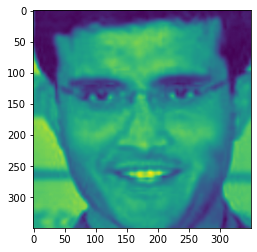

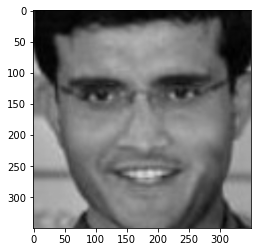

In [230]:
idx = 1
image1 = imagedir + '/' + face2.image.iloc[idx]
img=mpimg.imread(image1)
plt.imshow(img); plt.show()
# if img.ndim>2:
#     img = rgb2gray(img)
if img.ndim == 2:
    img = gray2rgb(img)
plt.imshow(img)

In [224]:
img

array([[[ 49,  49,  49],
        [ 48,  48,  48],
        [ 35,  35,  35],
        ...,
        [ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 48,  48,  48],
        [ 48,  48,  48],
        [ 35,  35,  35],
        ...,
        [ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 48,  48,  48],
        [ 47,  47,  47],
        [ 35,  35,  35],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       ...,

       [[139, 139, 139],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [ 82,  82,  82],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[139, 139, 139],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 71,  71,  71],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[139, 139, 139],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [ 72,  72,  72],
        [ 77,  77,  77],
        [ 78,  78,  78]]

In [175]:
test_image = []
for i in tqdm(range(X_file.shape[0])):
    image = imagedir + '/' + X_file[i]
    img=mpimg.imread(image)
#     if img.ndim>2:
#         img = rgb2gray(img)
    if img.ndim == 2:
        img = gray2rgb(img)
    test_image.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 848.25it/s]


In [176]:
test_image = np.stack(test_image, axis = 0)

In [177]:
test_image.shape

(500, 350, 350, 3)

In [235]:
from tensorflow.keras.models import load_model
model = load_model('initialmodelthree')

In [236]:
prediction = model.predict(test_image)

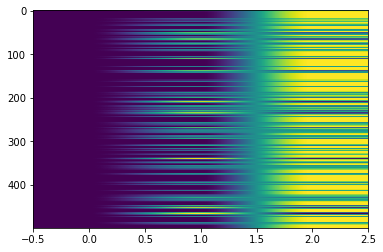

In [237]:
plt.imshow(prediction, aspect = 'auto')

In [238]:
pred = model.predict_classes(test_image)
lab = face2.emotion.apply(lambda x: facevalue[x])

In [240]:
np.mean(np.equal(lab, pred))

0.348

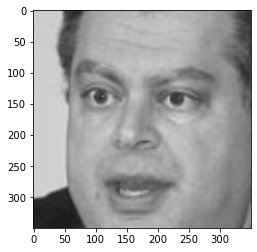

This person is showing neutral


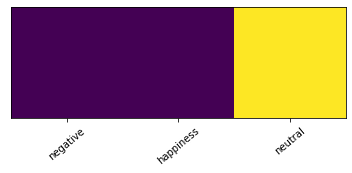

In [242]:
idx = 7
plt.imshow(test_image[idx])
plt.show()

lab = model.predict(test_image[idx].reshape(-1, 350, 350, 3))[0]
plt.imshow(lab.reshape(1,3)); plt.yticks([]); plt.xticks(np.arange(3), list(facevalue.keys()), rotation = 40)
print('This person is showing', list(facevalue.keys())[lab.argmax()])

In [62]:
list(facevalue.keys())

['contempt',
 'sad',
 'fear',
 'disgust',
 'sadness',
 'anger',
 'surprise',
 'happiness',
 'neutral']

In [159]:
face2.image

0       Sourav_Ganguly_0003.jpg
1       Sourav_Ganguly_0004.jpg
2       Sourav_Ganguly_0005.jpg
3      Spencer_Abraham_0001.jpg
4      Spencer_Abraham_0003.jpg
                 ...           
495       Tim_Pawlenty_0001.jpg
496        Tim_Robbins_0001.jpg
497        Tim_Robbins_0002.jpg
498        Tim_Robbins_0003.jpg
499        Tim_Robbins_0004.jpg
Name: image, Length: 500, dtype: object